# How income, income inequality and universal basic income affect crime rates?

In [1]:
#Importing pandas
import pandas as pd
#Importing numpy
import numpy as np
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Importing integration package
import scipy.integrate as integrate

In [2]:
#Importing income raw data
df1 = pd.read_csv('Copy of s133UN01qyLD (2).csv')
#Importing race raw data
df2 = pd.read_csv('Copy of s165u1u4BUbp (1).csv')

In [3]:
#Displaying income raw data
df1


,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688179,1983,15,999999999
688180,1983,15,35002
688181,1983,15,8502
688182,1983,15,0


In [4]:
type(df1["STATEFIP"][43])

numpy.int64

In [5]:
#Displaying race raw data
df2

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [6]:
#Counting the number of null values in race data
countnull = 0
for x in df2["RACE"]:
    if x == None:
        countnull = countnull+1
print(countnull)

0


In [7]:
#Counting the number of values greater than ten million, 9999999, one million, 999999, hundred thousand, ten thousand, 
#one thousand and less than zero respectively to determine what are the values of the erroneous values.
counttenmillion = 0
for x in df1["INCTOT"]:
    if 10000000 < x:
        counttenmillion = counttenmillion+1
print("Number of incomes greater than ten million = " + str(counttenmillion))
counttenmillionlessone = 0
for x in df1["INCTOT"]:
    if 9999999 < x:
        counttenmillionlessone = counttenmillionlessone+1
print("Number of incomes greater than seven figures = " + str(counttenmillionlessone))
countmillion = 0
for x in df1["INCTOT"]:
    if 1000000 < x:
        countmillion = countmillion+1
print("Number of incomes greater than one million = " + str(counttenmillion))
countmillion = 0
for x in df1["INCTOT"]:
    if 999999 < x:
        countmillion = countmillion+1
print("Number of incomes greater than six figures = " + str(countmillion))
countlakh = 0
for x in df1["INCTOT"]:
    if 99999 < x:
        countlakh = countlakh+1
print("Number of incomes greater than hundred thousand = " + str(countlakh))
countlakhs = 0
for x in df1["INCTOT"]:
    if 9999 < x:
        countlakhs = countlakhs+1
print("Number of incomes greater than ten thousands = " + str(countlakhs))
countthousand = 0
for x in df1["INCTOT"]:
    if 999 < x:
        countthousand = countthousand+1
print("Number of incomes greater than a thousand = " + str(countthousand))
countzero = 0
for x in df1["INCTOT"]:
    if x == 0:
        countzero = countzero+1
print("Number of people with zero incomes = " + str(countzero))
countneg = 0
for x in df1["INCTOT"]:
    if 0 > x:
        countneg = countneg+1
print("Number of people with negative income values = " + str(countneg))

Number of incomes greater than ten million = 164506
Number of incomes greater than seven figures = 164506
Number of incomes greater than one million = 164506
Number of incomes greater than six figures = 164506
Number of incomes greater than hundred thousand = 164683
Number of incomes greater than ten thousands = 368763
Number of incomes greater than a thousand = 589688
Number of people with zero incomes = 44076
Number of people with negative income values = 2665


We see there are 44076 unemployed people in this dataset and a further 2665 on government assistance. The vast majority 
of people have an income greater than a thousand and the erroneous values seem to all be greater than six figures. We will now
confirm the value(s) of these missing values.

In [8]:
df1[df1["INCTOT"] > 1000000]["INCTOT"].value_counts()

999999999    164506
Name: INCTOT, dtype: int64

As shown, they are all 999999999.

In [9]:
type(df2["YEAR"][21])

numpy.int64

The reason the number of incomes below 10 million, 7 figure-salaries, one million, six figures, a lakh, ten thousand, one thousand, exactly zero and negative were counted was two-fold. Firstly, many numbers in the orginal csv file were getting set to 999999999 by default if they were above a certain value. I wanted to find what the value above which these values were getting set to 999999999 by default. I found out it was when there were six figures. However, it may very well be that the numbers being set to 999999999 by default were getting set that way due to some other reason like being null or something. I don't know yet but I do hypothesize it will be those values greater than six figures.

In [10]:
#Creating dataframe with positive values less than ten million. The reason I did this was because while downloading the 
#data from IPUMS CPS many values were automatically getting set to 999999999 and so I just split the data with this dataset
#having the known values. I will fill in the mean of all the unknown values later after calculating it for each year.
df3 = df1[(df1.INCTOT<10000000)]

In [11]:
#Displaying income dataframe
df3

,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688177,1983,15,33011
688178,1983,15,3338
688180,1983,15,35002
688181,1983,15,8502


In [12]:
#Seeing the number of rows and columns in df3.
df3.shape

(523678, 3)

In [13]:
#This calculation was performed to verify the correct values were used. 
#Number of total original values - Number of values greater than a million = Number of current values in this set
688184-164506

523678

There were originally 688184 values with 164506 values being greater than a million and since we eliminated values greater than
a million, there are now 523678.

In [14]:
#Creating a dataframe with only 700,200 and 100 as values
df4 = df2[((df2.RACE==700) | (df2.RACE==200) | (df2.RACE==100))]

In [15]:
#Displaying race dataframe
df4 

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [16]:
#Counting the number of rows and columns in the race dataframe
df4.shape

(688184, 3)

In [17]:
#Splitting race and income dataframes by year
dfinc1980 = df3[df3["YEAR"] == 1980]
dfinc1981 = df3[df3["YEAR"] == 1981]
dfinc1982 = df3[df3["YEAR"] == 1982]
dfinc1983 = df3[df3["YEAR"] == 1983]
dfrace1980 = df4[df4["YEAR"] == 1980]
dfrace1981 = df4[df4["YEAR"] == 1981]
dfrace1982 = df4[df4["YEAR"] == 1982]
dfrace1983 = df4[df4["YEAR"] == 1983]

In [18]:
#Creating a dataframe with only values greater than a million to get what the average income of unreported incomes in each
#state was and the total number of unreported incomes in each state.
df5 = df1[(df1.INCTOT>10000000)]

In [19]:
#Splitting dataframes with high, and poverty-level incomes by year
dfinchigh1980 = df5[df5["YEAR"] == 1980]
dfinchigh1981 = df5[df5["YEAR"] == 1981]
dfinchigh1982 = df5[df5["YEAR"] == 1982]
dfinchigh1983 = df5[df5["YEAR"] == 1983]
dfincpoverty1980 = dfinc1980[dfinc1980["INCTOT"] <4160]
dfincpoverty1981 = dfinc1981[dfinc1981["INCTOT"] <4620]
dfincpoverty1982 = dfinc1982[dfinc1982["INCTOT"] <4901]
dfincpoverty1983 = dfinc1983[dfinc1983["INCTOT"] <5061]

In [20]:
inc1980ss = dfinc1980.groupby(["STATEFIP"]).describe().reset_index().to_csv("inc1980cleandata.csv")
inc1981ss = dfinc1981.groupby(["STATEFIP"]).describe().reset_index().to_csv("inc1981cleandata.csv")
inc1982ss = dfinc1982.groupby(["STATEFIP"]).describe().reset_index().to_csv("inc1982cleandata.csv")
inc1983ss = dfinc1983.groupby(["STATEFIP"]).describe().reset_index().to_csv("inc1983cleandata.csv")
inchigh1980ss = dfinchigh1980.groupby(["STATEFIP"]).describe().reset_index().to_csv("inchigh1980cleandata.csv")
inchigh1981ss = dfinchigh1981.groupby(["STATEFIP"]).describe().reset_index().to_csv("inchigh1981cleandata.csv")
inchigh1982ss = dfinchigh1982.groupby(["STATEFIP"]).describe().reset_index().to_csv("inchigh1982cleandata.csv")
inchigh1983ss = dfinchigh1983.groupby(["STATEFIP"]).describe().reset_index().to_csv("inchigh1983cleandata.csv")
incpoverty1980ss = dfincpoverty1980.groupby(["STATEFIP"]).describe().reset_index().to_csv("incpoverty1980cleandata.csv")
incpoverty1981ss = dfincpoverty1981.groupby(["STATEFIP"]).describe().reset_index().to_csv("incpoverty1981cleandata.csv")
incpoverty1982ss = dfincpoverty1982.groupby(["STATEFIP"]).describe().reset_index().to_csv("incpoverty1982cleandata.csv")
incpoverty1983ss = dfincpoverty1983.groupby(["STATEFIP"]).describe().reset_index().to_csv("incpoverty1983cleandata.csv")
race1980ss = dfrace1980.value_counts().groupby(["STATEFIP"]).describe().to_csv("race1980cleandata.csv")
race1981ss = dfrace1980.value_counts().groupby(["STATEFIP"]).describe().to_csv("race1981cleandata.csv")
race1982ss = dfrace1980.value_counts().groupby(["STATEFIP"]).describe().to_csv("race1982cleandata.csv")
race1983ss = dfrace1980.value_counts().groupby(["STATEFIP"]).describe().to_csv("race1983cleandata.csv")
df4.value_counts().reset_index().to_csv("racecounts.csv")

In [21]:
#Checking the unqiue values in df5
list(df5["INCTOT"].unique())

[999999999]

This confirms we have only dropped the values which were getting mutated to 999999999.

Poverty lines were different for different years.

In [22]:
#Printing the codes for the states(e.g 1=Alabama)
dfinc1980["STATEFIP"].unique()

array([23, 33, 50, 25, 44,  9, 36, 34, 42, 39, 18, 17, 26, 55, 27, 19, 29,
       38, 46, 31, 20, 10, 24, 11, 51, 54, 37, 45, 13, 12, 21, 47,  1, 28,
        5, 22, 40, 48, 30, 16, 56,  8, 35,  4, 49, 32, 53, 41,  6,  2, 15],
      dtype=int64)

In [23]:
dfinc1980Alaska = dfinc1980[dfinc1980["STATEFIP"] == 2]
dfinc1981Alaska = dfinc1981[dfinc1981["STATEFIP"] == 2]
dfinc1982Alaska = dfinc1982[dfinc1982["STATEFIP"] == 2]
dfinc1983Alaska = dfinc1983[dfinc1983["STATEFIP"] == 2]

In [24]:
dfinc1980Alaska["INCTOT"]

177397    11700
177398     7800
177400    11828
177403    11205
177404    10900
          ...  
179516     2706
179517     5829
179518    13800
179519    29070
179520     1720
Name: INCTOT, Length: 1520, dtype: int64

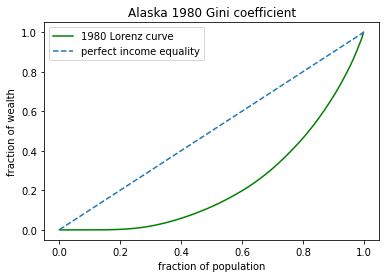

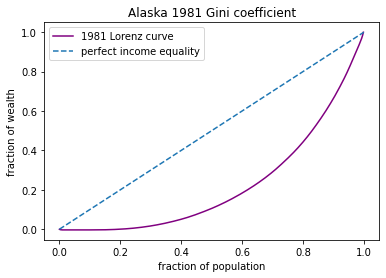

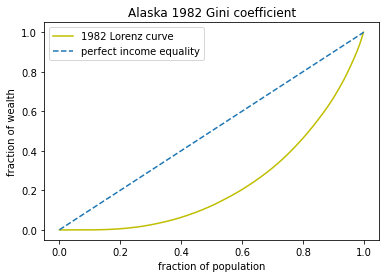

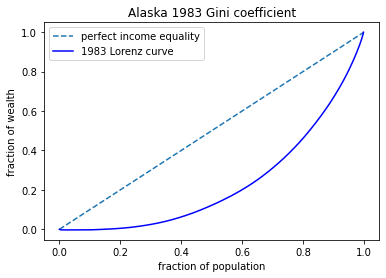

In [25]:
#Visualizing the Gini coefficient for Alaska by year
#Year 1980
plt.figure()
a=(0,1)
b=(0,1)
x1980=np.arange(0,dfinc1980Alaska['INCTOT'].count()/(1+dfinc1980Alaska['INCTOT'].count()),1/(1+dfinc1980Alaska['INCTOT'].count()))
y1980=dfinc1980Alaska['INCTOT'].sort_values().cumsum()/dfinc1980Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1980 Gini coefficient")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1981
plt.figure()
a=(0,1)
b=(0,1)
x1981=np.arange(0,dfinc1981Alaska['INCTOT'].count()/(1+dfinc1981Alaska['INCTOT'].count()),1/(1+dfinc1981Alaska['INCTOT'].count()))
y1981=dfinc1981Alaska['INCTOT'].sort_values().cumsum()/dfinc1981Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1981 Gini coefficient")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1982
plt.figure()
a=(0,1)
b=(0,1)
x1982=np.arange(0,dfinc1982Alaska['INCTOT'].count()/(1+dfinc1982Alaska['INCTOT'].count()),1/(1+dfinc1982Alaska['INCTOT'].count()))
y1982=dfinc1982Alaska['INCTOT'].sort_values().cumsum()/dfinc1982Alaska['INCTOT'].sum()
plt.plot(x1982,y1982,'y',label="1982 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1982 Gini coefficient")
plt.legend()
#Year 1983
plt.figure()
a=(0,1)
b=(0,1)
x1983=np.arange(0,dfinc1983Alaska['INCTOT'].count()/(1+dfinc1983Alaska['INCTOT'].count()),1/(1+dfinc1983Alaska['INCTOT'].count()))
y1983=dfinc1983Alaska['INCTOT'].sort_values().cumsum()/dfinc1983Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1983 Gini coefficient")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1983,y1983,'blue',label="1983 Lorenz curve")
plt.legend()

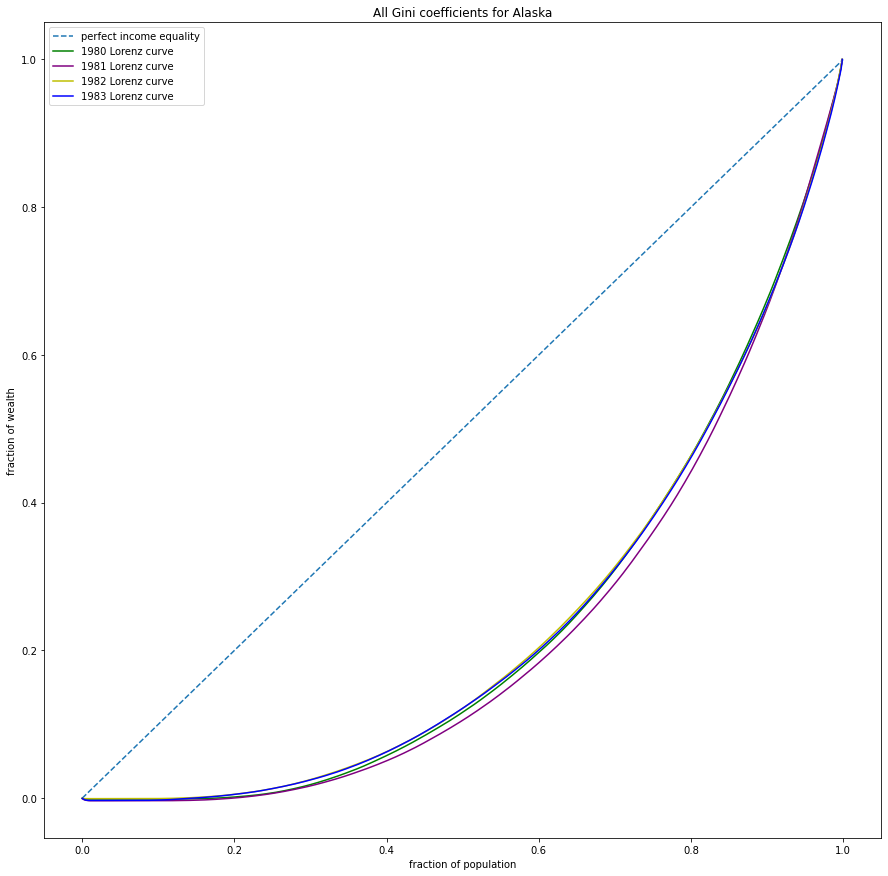

In [26]:
#All 4 of the above plots in one figure
plt.figure(figsize=(15,15))
a=(0,1)
b=(0,1)
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("All Gini coefficients for Alaska")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(x1982,y1982,'y',label="1982 Lorenz curve")
plt.plot(x1983,y1983,'blue',label="1983 Lorenz curve")
plt.legend()

As can be seen in this figure, the purple 1981 line has the highest level of income inequality and thus should have the highest gini coefficient which we will soon find out whether this is the case or not. 

In [27]:
#Gini coefficients for Alaska across four years
z = integrate.simpson(y1980, x1980)
print(1-2*z)
z = integrate.simpson(y1981, x1981)
print(1-2*z)
z = integrate.simpson(y1982, x1982)
print(1-2*z)
z = integrate.simpson(y1983, x1983)
print(1-2*z)

0.5425920220116938
0.5599514210637335
0.5376873955415595
0.5402283730686206


For Alaska, we see that income inequality increased significantly from 1980 to 1981 but then shot down singnificantly as soon as the Alaska permanent fund was introduced in 1982. This makes a lot of sense as a 1000 dollars means a lot more to people who are unemployed or on benefits compared to people who are wealthy as a percentage of their income. For example, If someone is earning 200 a month their incomes sextuples compared to someone earning 2000 whose income only increases 50%. Also, 1981 does have the highest gini coefficient thus our predictions make sense. 

In [39]:
#Printing the Gini coefficients for each state
for x in dfinc1980["INCTOT"]:
    why = x.groupby(["STATEFIP"]).sort_values().cumsum()/x.groupby(["STATEFIP"]).sum()
    eks = np.arange(0,1,1/x.groupby(["STATEFIP"]).count())
    eksit = np.arange(0,x.groupby(["STATEFIP"]).count()/(1+x.groupby(["STATEFIP"]).count()),1/(1+x.groupby(["STATEFIP"]).count()))
    if  why.size == eks.size:
        z1 = integrate.simpson(why, eks)
        print(1-2*z1)
    elif why.size == eksit.size:
        z2 = integrate.simpson(why, eksit)
        print(1-2*z2)

AttributeError: 'int' object has no attribute 'groupby'

The North Dakota data value did not print for some reason so I gave it a null value in my final clean data table.

In [ ]:
#Calculating the percentage of unreported incomes by year
a = dfinc1980['INCTOT'].count()/dfallinc1980['INCTOT'].count()
b = dfinc1981['INCTOT'].count()/dfallinc1981['INCTOT'].count()
c = dfinc1982['INCTOT'].count()/dfallinc1982['INCTOT'].count()
d = dfinc1983['INCTOT'].count()/dfallinc1983['INCTOT'].count()
print("Percentage of unreported population in 1980= " + str(a))
print("Percentage of unreported population in 1981= " + str(b))
print("Percentage of unreported population in 1982= " + str(c))
print("Percentage of unreported population in 1983= " + str(d))

This means that about 76% of incomes were reported and that about 76% of people did not have a pre-tax personal income of greater than a million dollars in each year while 24% of the data is unreported and thus we will need to estimate it. Therefore, with a,b,c and d representing the percentage of people who weren't reported in each year, we get the equation average mean income in 1980 = unreported mean income in 1980* percentage unreported incomes in 1980+ reported mean incomes in 1980* percentage reported incomes in 1980.


Taking percentage unreported as a,b,c or d depending on the year, the percentage reported as (1-a),(1-b),(1-c),(1-d) and the average pre-tax personal incomes as 21020, 22390, 23430, 24580. We only need unreported mean incomes in each year which are calculated two cells below. The average income is calculated and displayed in the next cell.

In [ ]:
#Calculating the mean of reported incomes in each year in each state
e = dfinc1980['INCTOT'].mean()
f = dfinc1981['INCTOT'].mean()
g = dfinc1982['INCTOT'].mean()
h = dfinc1983['INCTOT'].mean()
print("Mean income of reported population in 1980= " + str(e))
print("Mean income of reported population in 1981= " + str(f))
print("Mean income of reported population in 1982= " + str(g))
print("Mean income of reported population in 1983= " + str(h))

Rearranging the equation for average mean income in terms of unreported mean income we get, avg unreported inc = (avg mean inc - reported mean income * percentage reported)/percent unreported

In [ ]:
#Calculating unreported mean incomes by year using average national income in each year
#1980
millionmeaninc1980 = (21020 - 9017.828051732786*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of high income earners in 1980 = " + str(millionmeaninc1980))
#1981
millionmeaninc1981 = (22390 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of high income earners in 1981 = " + str(millionmeaninc1981))
#1982
millionmeaninc1982 = (23430 - 10718.48132763349*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of high income earners in 1982 = " + str(millionmeaninc1982))
#1983
millionmeaninc1983 = (24580 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of high income earners in 1983 = " + str(millionmeaninc1983))

In [ ]:
#Printing the percentage of the population whose race is classified as "white"
#The results are copy pasted to the finalcleandata.xlsx - Sheet1 (1).csv file in the white percentage column
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 100].count()
    z=b/a
    print(z["RACE"])

In [ ]:
#Printing the percentage of the population whose race is classified as "black"
#The results are copy pasted to the finalcleandata.xlsx - Sheet1 (1).csv file in the black percentage column
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 200].count()
    z=b/a
    print(z["RACE"])

In [ ]:
#Printing the percentage of the population whose race is classified as "other"
#The results are copy pasted to the finalcleandata.xlsx - Sheet1 (1).csv file  in the other percentage column
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 700].count()
    z=b/a
    print(z["RACE"])

In [ ]:
#Importing necessary packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [ ]:
#Loading in the data
df1 = pd.read_csv('finalcleandatasql.csv')

In [ ]:
#Splitting the data by year as well as the 2 years right before the implementation of the fund(i.e. dfprefund in 1980,1981)
#and the first 2 years after the fund(i.e. dfpostfund in 1982,1983)
dfprefund = df1[(df1['countyear'] == 1980) | (df1['countyear'] == 1981)]
dfpostfund = df1[(df1['countyear'] == 1982) | (df1['countyear'] == 1983)]
df1980 = df1[(df1['countyear'] == 1980)]
df1981 = df1[(df1['countyear'] == 1981)]
df1982 = df1[(df1['countyear'] == 1982)]
df1983 = df1[(df1['countyear'] == 1983)]

In [ ]:
#Taking a high-level look at the data.
df1

In [ ]:
for x in df1980, df1981, df1982, df1983:
    y = x.describe()
    print(str(x) + str(y))

In [ ]:
#Creating summary statistics for each dataset by year
df1980.describe().to_csv("1980summarystatistics")
df1981.describe().to_csv("1981summarystatistics")
df1982.describe().to_csv("1982summarystatistics")
df1983.describe().to_csv("1983summarystatistics")

In [ ]:
#Creating a dataset without DC as DC is an outlier due to its small size(area and population), high income and high crime rates
dfwithoutdc = df1[df1['statefip'] != 11] 

In [ ]:
#Taking a high-level look at the data without DC.
dfwithoutdc

In [ ]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefund

In [ ]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfund

In [ ]:
#Creating a dataset without DC for the final 2 years implementation of the fund
dfprefundwithoutdc = dfprefund[dfprefund['statefip'] != 11] 

In [ ]:
#Creating a dataset without DC for the first 2 years after the implementation of the fund
dfpostfundwithoutdc = dfpostfund[dfpostfund['statefip'] != 11] 

In [ ]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefundwithoutdc

In [ ]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfundwithoutdc

In [ ]:
#Creating our model. Taken from https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d.
X1 = df1.iloc[:,3].values.reshape(-1, 1)
X2 = df1.iloc[:,4].values.reshape(-1, 1)
X3 = dfwithoutdc.iloc[:,3].values.reshape(-1, 1)
X4 = dfwithoutdc.iloc[:,4].values.reshape(-1, 1)
X5 = dfprefundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X6 = dfprefundwithoutdc.iloc[:,4].values.reshape(-1, 1)
X7 = dfpostfundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X8 = dfpostfundwithoutdc.iloc[:,4].values.reshape(-1, 1)
Y1 = df1.iloc[:,21].values.reshape(-1, 1)
Y2 = df1.iloc[:,22].values.reshape(-1, 1)
Y3 = dfwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y4 = dfwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y5 = dfprefundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y6 = dfprefundwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y7 = dfpostfundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y8 = dfpostfundwithoutdc.iloc[:,22].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)
linear_regressor.fit(X1, Y2)
linear_regressor.fit(X2, Y1)
linear_regressor.fit(X2, Y2)
linear_regressor.fit(X3, Y3)
linear_regressor.fit(X3, Y4)
linear_regressor.fit(X4, Y3)
linear_regressor.fit(X4, Y4)
linear_regressor.fit(X5, Y5)
linear_regressor.fit(X5, Y6)
linear_regressor.fit(X6, Y5)
linear_regressor.fit(X6, Y6)
linear_regressor.fit(X7, Y7)
linear_regressor.fit(X7, Y8)
linear_regressor.fit(X8, Y7)
linear_regressor.fit(X8, Y8)
Y_predv1 = linear_regressor.predict(X1) 
Y_predp1 = linear_regressor.predict(X1) 
Y_predv2 = linear_regressor.predict(X2)
Y_predp2 = linear_regressor.predict(X2) 
Y_predv3 = linear_regressor.predict(X3)
Y_predp3 = linear_regressor.predict(X3) 
Y_predv4 = linear_regressor.predict(X4)
Y_predp4 = linear_regressor.predict(X4) 
Y_predv5 = linear_regressor.predict(X5)
Y_predp5 = linear_regressor.predict(X5) 
Y_predv6 = linear_regressor.predict(X6)
Y_predp6 = linear_regressor.predict(X6) 
Y_predv7 = linear_regressor.predict(X7)
Y_predp7 = linear_regressor.predict(X7) 
Y_predv8 = linear_regressor.predict(X8) 
Y_predp8 = linear_regressor.predict(X8) 

In [ ]:
#Reading some values of the data.
X1, X2, Y1, Y2

In [ ]:
#Adding in constants for our regression.
v1 = sm.add_constant(X1)
v2 = sm.add_constant(X2)
v3 = sm.add_constant(X3)
v4 = sm.add_constant(X4)
v5 = sm.add_constant(X5)
v6 = sm.add_constant(X6)
v7 = sm.add_constant(X7)
v8 = sm.add_constant(X8)

In [ ]:
#Visualizing figure 1.
p1 = sb.regplot(x=X1,y=Y1)
p1.set_xlabel("Average income", fontsize = 20)
p1.set_ylabel("Violent Crime Rate", fontsize = 20)
p1.set_title("Fig 1. All violent crime rates vs average incomes", fontsize = 16)

From this plot, we can see there is an outlier which is DC.

In [ ]:
#Visualizing figure 2.
p2 = sb.regplot(x=X1,y=Y2)
p2.set_xlabel("Average income", fontsize = 20)
p2.set_ylabel("Property Crime Rate", fontsize = 20)
p2.set_title("Fig 2. All property crime rates vs average incomes", fontsize = 16)

In [ ]:
#Visualizing figure 3.
p3 = sb.regplot(x=X2,y=Y1)
p3.set_xlabel("Gini Coefficient", fontsize = 20)
p3.set_ylabel("Violent Crime Rate", fontsize = 20)
p3.set_title("Fig 3. All violent crime rates vs Gini coefficients", fontsize = 16)

From this plot, we can see DC is an outlier for violent crime once again. This means it is best to do our analysis for violent crime without DC altogether as it would skew the results. It is hypothesized DC would have significantly higher violent crime anyway due to the significantly higher population density. I also think the reason it is not an outlier for property crime is because of the significantly higher mean income compared to the other states.

In [ ]:
#Visualizing figure 4.
p4 = sb.regplot(x=X2,y=Y2)
p4.set_xlabel("Gini Coefficient", fontsize = 20)
p4.set_ylabel("Property Crime Rate", fontsize = 20)
p4.set_title("Fig 4. All property crime rates vs Gini coefficients", fontsize = 16)

As hypothesized, DC is not an outlier for property crime.

In [ ]:
#Visualizing figure 5.
p5 = sb.regplot(x=X3,y=Y3)
p5.set_xlabel("Average income", fontsize = 20)
p5.set_ylabel("Violent Crime Rate", fontsize = 20)
p5.set_title("Fig 5. All violent crime rates vs average incomes besides DC", fontsize = 16)

It can be argued there is a weak positive correlation here although p-values need to be seen to comprehend it better. The correlation is very weak and not that 

In [ ]:
#Visualizing figure 6.
p6 = sb.regplot(x=X3,y=Y4)
p6.set_xlabel("Average Income", fontsize = 20)
p6.set_ylabel("Property Crime Rate", fontsize = 20)
p6.set_title("Fig 6. All property crime rates vs Average Incomes besides DC", fontsize = 16)

Once again, by insepction, there appears to be a weak positive correaltion. The causal reason for this may be that as society becomes ultra-wealthy, there is more to steal and so people commit property crimes due to jealousy.

In [ ]:
#Visualizing figure 7.
p7 = sb.regplot(x=X4,y=Y3)
p7.set_xlabel("Gini coefficient", fontsize = 20)
p7.set_ylabel("Violent Crime Rate", fontsize = 20)
p7.set_title("Fig 7. All violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be no correlation according to the naked eye.

In [ ]:
#Visualizing figure 8.
p8 = sb.regplot(x=X4,y=Y4)
p8.set_xlabel("Gini Coefficient", fontsize = 20)
p8.set_ylabel("Property Crime Rate", fontsize = 20)
p8.set_title("Fig 8. All property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a much stronger negative correlation where property crime goes down as income inequality increases.

In [ ]:
#Visualizing figure 9.
p9 = sb.regplot(x=X5,y=Y5)
p9.set_xlabel("Average income", fontsize = 20)
p9.set_ylabel("Violent Crime Rate", fontsize = 20)
p9.set_title("Fig 9. 1980-81 violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a strongish postive correlation here where violent crime goes up as mean income goes up.

In [ ]:
#Visualizing figure 10.
p10 = sb.regplot(x=X5,y=Y6)
p10.set_xlabel("Average income", fontsize = 20)
p10.set_ylabel("Property Crime Rate", fontsize = 20)
p10.set_title("Fig 10. 1980-81 property crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a very strong postive correlation between property crime going up as income goes up.

In [ ]:
#Visualizing figure 11.
p11 = sb.regplot(x=X6,y=Y5)
p11.set_xlabel("Gini Coefficient", fontsize = 20)
p11.set_ylabel("Violent Crime Rate", fontsize = 20)
p11.set_title("Fig 11. 1980-81 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There seems to be no correlation here.

In [ ]:
#Visualizing figure 12.
p12 = sb.regplot(x=X6,y=Y6)
p12.set_xlabel("Gini Coefficient", fontsize = 20)
p12.set_ylabel("Property Crime Rate", fontsize = 20)
p12.set_title("Fig 12. 1980-81 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a weak negative correlation here.

In [ ]:
#Visualizing figure 13.
p13 = sb.regplot(x=X7,y=Y7)
p13.set_xlabel("Average income", fontsize = 20)
p13.set_ylabel("Violent Crime Rate", fontsize = 20)
p13.set_title("Fig 13. 1982-83 violent crime rates vs Average Incomes besides DC", fontsize = 16)

There appears to be a weak positive correlation here where violent crime goes up as average income increases. 

In [ ]:
#Visualizing figure 14.
p14 = sb.regplot(x=X7,y=Y8)
p14.set_xlabel("Average income", fontsize = 20)
p14.set_ylabel("Property Crime Rate", fontsize = 20)
p14.set_title("Fig 14. 1982-83 property crime rates vs Average Incomes besides DC", fontsize = 16)

There is a very strong positive correlation here as property crime goes up as average income goes up.

In [ ]:
#Visualizing figure 15.
p15 = sb.regplot(x=X8,y=Y7)
p15.set_xlabel("Gini Coefficient", fontsize = 20)
p15.set_ylabel("Violent Crime Rate", fontsize = 20)
p15.set_title("Fig 15. 1982-83 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be no correlation between the Gini coefficient and income inequality.

In [ ]:
#Visualizing figure 16.
p16 = sb.regplot(x=X8,y=Y8)
p16.set_xlabel("Gini Coefficient", fontsize = 20)
p16.set_ylabel("Property Crime Rate", fontsize = 20)
p16.set_title("Fig 16. 1982-83 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a slightly weak negative correlation between property crime and income inequality.

In [ ]:
#Fitting a linear regression model to the data which we will get parameters and p-values from later.
res1 = sm.OLS(df1['violentcrime'], v1).fit()
res2 = sm.OLS(df1['propertycrime'], v1).fit()
res3 = sm.OLS(df1['violentcrime'], v2).fit()
res4 = sm.OLS(df1['propertycrime'], v2).fit()
res5 = sm.OLS(dfwithoutdc['violentcrime'], v3).fit()
res6 = sm.OLS(dfwithoutdc['propertycrime'], v3).fit()
res7 = sm.OLS(dfwithoutdc['violentcrime'], v4).fit()
res8 = sm.OLS(dfwithoutdc['propertycrime'], v4).fit()
res9 = sm.OLS(dfprefundwithoutdc['violentcrime'], v5).fit()
res10 = sm.OLS(dfprefundwithoutdc['propertycrime'], v5).fit()
res11 = sm.OLS(dfprefundwithoutdc['violentcrime'], v6).fit()
res12 = sm.OLS(dfprefundwithoutdc['propertycrime'], v6).fit()
res13 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v7).fit()
res14 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v7).fit()
res15 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v8).fit()
res16 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v8).fit()

In [ ]:
#Creating a list of fits.
resultslist = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11,res12,res13,res14,
              res15,res16]

In [ ]:
#Creating a lists of parameters.
for (a,b) in zip(resultslist, range(1,17)):
    z = str(a.summary())
    y = "Fig " + str(b) + ".\n" + z
    print(y)

Key findings:-
1) DC is a complete and total outlier because the crime rate(both property and violent) that it significantly skews and subsequently biases the data.
2) We have continuously got statistically significant results at the 5% level that, in general, violent and property increases when there is more income. This makes sense for property crime intuitively as more income means more wealth to steal but not violent crime as you would think more income would mean more investment in the police force which would mean fewer criminals get away with their crimes.
3) Violent crime goes up with more income inequality(as measured by the Gini coefficient) but property crime goes down. These findings are statistically significant also till the 5% level and for property crime at the 0.1% level also. 
4) The only feasible explanation for why this is happening with violent crime is that when income and income inequality increase simultaneously people tend to become violent as an increase in income would mean a better prepared police force(as long as funds are distributed appropriately).
5) An implementation of an universal basic income decreased violent crime by 0.0058 and property crime by 0.1767 incidents for every $1 increase income.
6) Similarly, violent crime went down by 4.4128 and property crime by 34.1578 incidents for every 1 point increase in the Gini coefficient after the implementation of the universal basic income.